<a href="https://colab.research.google.com/github/midiazdi/ML/blob/master/Comparativa_SVN_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Lectura del set de datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
plt.style.use('ggplot')


df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##1.1 Análisis Exploratori
1. age: Edad de los individuos.
2. sex: Género de los individuos.
3. bmi: Índice de masa corporal de los individuos.
4. children: Número de hijos o dependientes.
5. smoker: Indicador de si el individuo es fumador o no.
6. region: Región geográfica de residencia.
7. charges (**variable a predecir**): Costos o cargos asociados a los individuos.



##Regresión lineal

Text(1, 60000, 'Score del modelo: (0.7999876970680434, 5)')

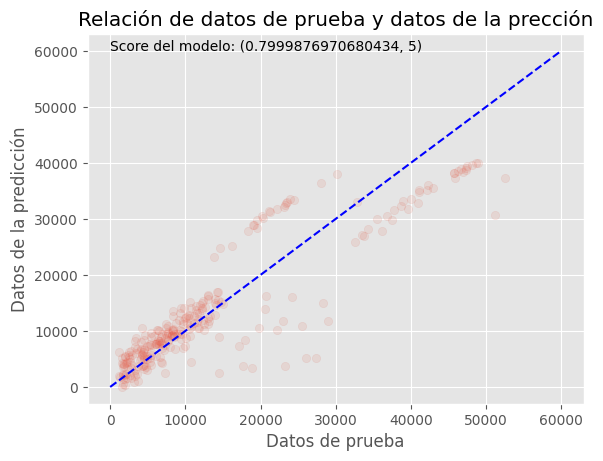

In [ ]:
#pre procesamiento

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

numeric_col = X_train.select_dtypes(include=['float64','int']).columns.to_list()
object_col = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

ct = ColumnTransformer([('scaler', StandardScaler(), numeric_col),
                        ('one-hot', OneHotEncoder(),object_col)],remainder='passthrough')

X_train_st = ct.fit_transform(X_train)
X_test_st = ct.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_st,y_train)

y_pred = lr.predict(X_test_st)
f = plt.figure()
plt.scatter(y_test, y_pred, alpha=0.1)
plt.plot([0,60000],[0,60000], '--', color='blue')
plt.xlabel('Datos de prueba')
plt.ylabel('Datos de la predicción')
plt.title('Relación de datos de prueba y datos de la prección')
plt.text(1,60000,f'Score del modelo: {lr.score(X_test_st,y_test),5}')


##SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(1, 50000, 'R^2 del modelo: 0.885620615657862')

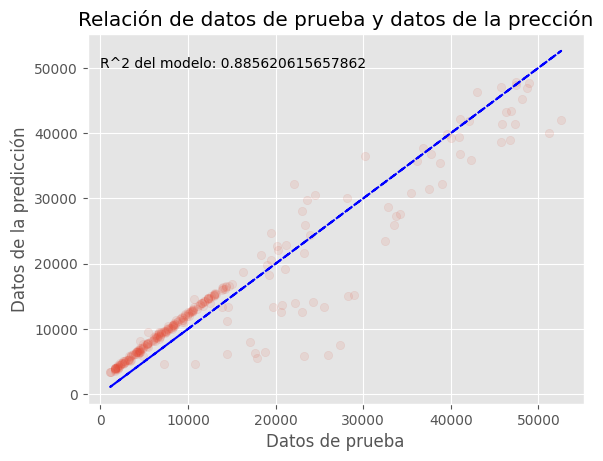

In [ ]:
XX = df.iloc[:,:-1]
yy = df.iloc[:,-1]

XX_train, XX_test, yy_train, yy_test =  train_test_split(XX, yy, test_size=0.2, random_state=0)

numeric_col = XX_train.select_dtypes(include=['float64','int']).columns.to_list()
object_col = XX_train.select_dtypes(include=['object', 'category']).columns.to_list()

ct = ColumnTransformer([('one-hot', OneHotEncoder(),object_col),
                        ('scaler', StandardScaler(), numeric_col)],remainder='passthrough')

ct_y = ColumnTransformer([('scaler', StandardScaler(),[0])],remainder='passthrough')

XX_train_st = ct.fit_transform(XX_train)
XX_test_st = ct.transform(XX_test)

yy_train_st = ct_y.fit_transform(np.reshape([yy_train], (len(yy_train),1)))
yy_test_st = ct_y.transform(np.reshape([yy_test], (len(yy_test),1)))

sv = SVR(C=1, epsilon=0.2)
sv.fit(XX_train_st, yy_train_st)

yy_pred = sv.predict(XX_test_st)
scaler =ct_y.named_transformers_['scaler']

yy_pred_inverse = scaler.inverse_transform(np.reshape([yy_pred], (len(yy_pred),1)))
yy_test_inverse = scaler.inverse_transform(yy_test_st)


f = plt.figure()
plt.scatter(yy_test_inverse, yy_pred_inverse, alpha=0.1)
plt.plot(yy_test,yy_test, '--', color='blue')
plt.xlabel('Datos de prueba')
plt.ylabel('Datos de la predicción')
plt.title('Relación de datos de prueba y datos de la prección')
plt.text(1,50000,f'R^2 del modelo: {sv.score(XX_test_st,yy_test_st)}')



StandardScaler()